In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

%matplotlib inline

# 1. Linear Regression

Trivial case of fitting a straight line 

a. We have $N$ data points with input {$t_n$} and targets {$x_n$} 

b. Want to find the best fit line $f_n=k_1t_n+k_0$ in the least-squares sense

c. Define an error function $E=\frac{1}{2N}\sum_{n=1}^{N}(f_n-x_n)^2$

d. Goal: Find $k_0, k_1$ to minimize $E$

### 1.1 Using calculus, we have to minimizse $\frac{\partial E}{\partial k_i}=0$:

This gives us:

$k_0 = \frac{\langle t^2\rangle \langle x\rangle -\langle xt\rangle \langle t\rangle }{\langle t^2\rangle -\langle t\rangle ^2}$

$k_1= \frac{\langle xt\rangle - \langle x\rangle \langle t\rangle}{\langle t^2\rangle - \langle t\rangle ^2}$

### 1.2 Example fitting y = 3x-5

$k_0 =-5$,
$k_1=3$


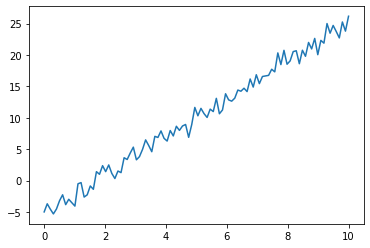

In [43]:
N=100
mu,sigma=0,1
e=np.random.normal(mu,sigma,N)

T=np.linspace(0,10,N)
X=3*T-5+e

plt.plot(T,X);

In [44]:
t_mean=np.mean(T)
t2_mean=np.mean(T**2)
x_mean=np.mean(X)
xt_mean=np.mean(X*T)

k_0=(t2_mean*x_mean-xt_mean*t_mean)/(t2_mean-t_mean**2)
k_1=(xt_mean-x_mean*t_mean)/(t2_mean-t_mean**2)

k_0= -5.1740370138763945  k_1= 3.0338771337065533


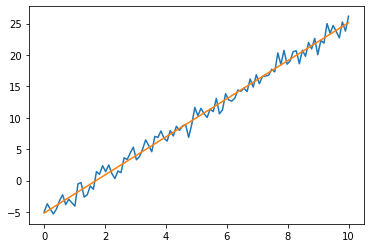

In [45]:
F=T*k_1+k_0
print('k_0=',k_0,' k_1=',k_1)

plt.plot(T,X)
plt.plot(T,F);

### 1.3 Using PyTorch to fit this 